In [2]:
# Everything you might want to import... Remove what you don't use! 
# import calendar
# import datetime as dt 
# from dotenv import dotenv_values 
# import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
# import os 
import pandas as pd
# import requests
# from simpletsmodel import *
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
# from statsmodels.tsa.seasonal import seasonal_decompose
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from utils import *
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

A good [resource](https://towardsdatascience.com/how-to-crush-your-data-take-home-interview-a0b9f7c97d6). 

When you're done, create a brief presentation: 
- Introduce problem
- Overview of process 
- Highlight key results 
- Recommendations / Conclusions / Future Work 

# Data Analysis Skeleton (TITLE)

This project is broken into 6 steps: 
1. [Problem Definition](#problem_definition)
2. [Gathering Data / Information](#get_data)
3. [Data Cleaning / Imputation](#clean)
4. [Exploratory Analysis](#explore)
5. [Model Fitting](#fit)
6. [Interpret Results](#interpret)

# 1. Problem definition <a id='problem_definition'></a>

1. Identify if it is common for commercial buildings to be larger than 5000 sqft. 
    - Calculate the average size (mean sqft per building) of full population of **commercial** buildings in Illinois. 

Question: Would you use this metric of the mean building size to answer their question of whether it’s  common for commercial buildings to be larger than 5000 square feet? Please explain why or why  not and provide visuals if you think visuals would help explain this to a non-technical audience. 

NOTE: 
- **Illinois** based client
    - According to [US Census Region Map](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf): 
        - Illinios is in the Midwest Region (**Region 2**). 
        - Illinois is in the East North Central	Division (**Division 3**)
- Interested in **commercial buildings**
    - **PBA (Principal building activity) = Office = 2**
- Interested in energy usage data (**consumption and expenditures**)


# 2. Gathering Data / Information <a id='get_data'></a>

In [109]:
df = pd.read_csv('data/2012_public_use_data_aug2016.csv', sep=",")

In [110]:
commercial = df[['PUBID','REGION', 'CENDIV', 'PBA', 'SQFT', 'SQFTC', 'YRCON', 'HTPMPH']].copy()             

In [111]:
ENC = commercial[commercial['CENDIV'] == 3].copy()

In [112]:
commercial.head(2)

,PUBID,REGION,CENDIV,PBA,SQFT,SQFTC,YRCON,HTPMPH
0,1,2,4,26,2400,2,1975,2.0
1,2,3,5,23,114000,7,1985,2.0


Clarifying values: 

HTPMPH (Heat pumps for heating): 
- "'1' = 'Yes'
- '2' = 'No'
- Missing = Not applicable


In [113]:
commercial.shape

(6720, 8)

In [114]:
ENC.shape

(900, 8)

**There is information on 6720 commercial buildings.**

**900 of the buildings are in the East North Central region.**

### Calculate the average size (mean sqft per building) of full population of commercial buildings in Illinois.

In [115]:
round(ENC['SQFT'].mean())

146902

The mean size of commercial buildings in the East North Central	Division is 14,6902 sqft. 

This is **not** a good metric to determine if it is common for commercial buildings to be >5,000 sqft.  

The mean value can be driven by outliers. 

For example, on the histogram below, the mean line is the solid vertical dotted line. 

While most of the data is in the first bin (indicating that the square footage of most buildings is between 1-70,000 SQFT), the mean is significantly higher.  

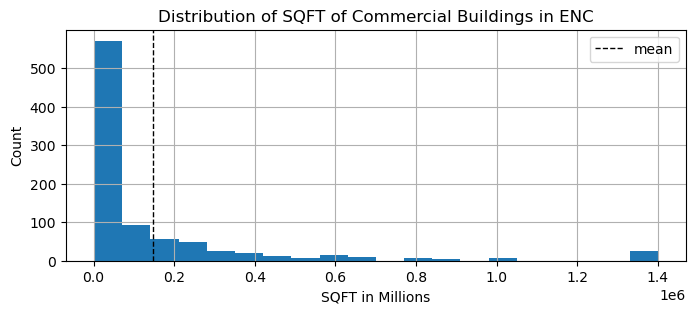

In [117]:
fig, axis = plt.subplots(figsize=(8,3))
ENC['SQFT'].hist(ax=axis, bins=20)
plt.xlabel("SQFT in Millions")
plt.ylabel("Count")
plt.title('Distribution of SQFT of Commercial Buildings in ENC')

plt.axvline(ENC['SQFT'].mean(), color='k', linestyle='dashed', linewidth=1, label='mean')

plt.legend()

plt.show()

____
## Alternative Method : Calculate Percentage of Commercial Buildings > 5,000 SQFT

In [118]:
print(f"{round(len(ENC[ENC['SQFT'] > 5000])/ENC.shape[0], 2)*100}% of buildings are over 5000SQFT")

76.0% of buildings are over 5000SQFT


<AxesSubplot:xlabel='over_5000', ylabel='count'>

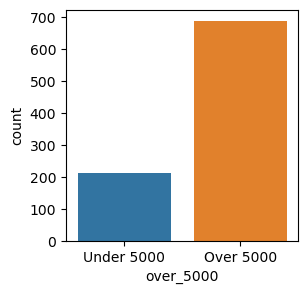

In [128]:
# Add a categorical column indicating buildings over and under 5,000 SQFT. 
ENC['over_5000'] = np.where(ENC['SQFT'] > 5000, 'Over 5000', 'Under 5000')
fig, ax = plt.subplots(figsize=(3,3))
sns.countplot(x='over_5000', data=ENC)